# Pandas怎样快捷方便的处理日期数据

Pandas日期处理的作用：将2018-01-01、1/1/2018等多种日期格式映射成统一的格式对象，在该对象上提供强大的功能支持

几个概念：
1. pd.to_datetime：pandas的一个函数，能将字符串、列表、series变成日期形式
2. Timestamp：pandas表示日期的对象形式
3. DatetimeIndex：pandas表示日期的对象列表形式

其中：
* DatetimeIndex是Timestamp的列表形式
* pd.to_datetime对单个日期字符串处理会得到Timestamp
* pd.to_datetime对日期字符串列表处理会得到DatetimeIndex

<img src="./other_files/pandas-todatetime-timestamp-datetimeindex.png" style="margin-left:0px"/>

### 问题：怎样统计每周、每月、每季度的最高温度？

### 1、读取天气数据到dataframe

In [21]:
import pandas as pd
%matplotlib inline

In [22]:
fpath = "./datas/beijing_tianqi/beijing_tianqi_2018.csv"
df = pd.read_csv(fpath)
# 替换掉温度的后缀℃
df.loc[:, "bWendu"] = df["bWendu"].str.replace("℃", "").astype('int32')
df.loc[:, "yWendu"] = df["yWendu"].str.replace("℃", "").astype('int32')
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1


### 2、将日期列转换成pandas的日期

In [3]:
df.set_index(pd.to_datetime(df["ymd"]), inplace=True)

In [4]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,,
2018-01-01,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
2018-01-02,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2018-01-03,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
2018-01-04,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
2018-01-05,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1


In [5]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='ymd', length=365, freq=None)

In [6]:
# DatetimeIndex是Timestamp的列表形式
df.index[0]

Timestamp('2018-01-01 00:00:00')

### 3、 方便的对DatetimeIndex进行查询

In [7]:
# 筛选固定的某一天
df.loc['2018-01-05']

ymd          2018-01-05
bWendu                3
yWendu               -6
tianqi             多云~晴
fengxiang           西北风
fengli             1-2级
aqi                  50
aqiInfo               优
aqiLevel              1
Name: 2018-01-05 00:00:00, dtype: object

In [8]:
# 日期区间
df.loc['2018-01-05':'2018-01-10']

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,,
2018-01-05,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1
2018-01-06,2018-01-06,2,-5,多云~阴,西南风,1-2级,32,优,1
2018-01-07,2018-01-07,2,-4,阴~多云,西南风,1-2级,59,良,2
2018-01-08,2018-01-08,2,-6,晴,西北风,4-5级,50,优,1
2018-01-09,2018-01-09,1,-8,晴,西北风,3-4级,34,优,1
2018-01-10,2018-01-10,-2,-10,晴,西北风,1-2级,26,优,1


In [9]:
# 按月份前缀筛选
df.loc['2018-03']

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,,
2018-03-01,2018-03-01,8,-3,多云,西南风,1-2级,46,优,1
2018-03-02,2018-03-02,9,-1,晴~多云,北风,1-2级,95,良,2
2018-03-03,2018-03-03,13,3,多云~阴,北风,1-2级,214,重度污染,5
2018-03-04,2018-03-04,7,-2,阴~多云,东南风,1-2级,144,轻度污染,3
2018-03-05,2018-03-05,8,-3,晴,南风,1-2级,94,良,2
2018-03-06,2018-03-06,6,-3,多云~阴,东南风,3-4级,67,良,2
2018-03-07,2018-03-07,6,-2,阴~多云,北风,1-2级,65,良,2
2018-03-08,2018-03-08,8,-4,晴,东北风,1-2级,62,良,2
2018-03-09,2018-03-09,10,-2,多云,西南风,1-2级,132,轻度污染,3


In [10]:
# 按月份前缀筛选
df.loc["2018-07":"2018-09"].index

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16',
               '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
               '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24',
               '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
               '2018-07-29', '2018-07-30', '2018-07-31', '2018-08-01',
               '2018-08-02', '2018-08-03', '2018-08-04', '2018-08-05',
               '2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09',
               '2018-08-10', '2018-08-11', '2018-08-12', '2018-08-13',
               '2018-08-14', '2018-08-15', '2018-08-16', '2018-08-17',
               '2018-08-18', '2018-08-19', '2018-08-20', '2018-08-21',
               '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-25',
      

In [11]:
# 按年份前缀筛选
df.loc["2018"].head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,,
2018-01-01,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
2018-01-02,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2018-01-03,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
2018-01-04,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
2018-01-05,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1


### 4、方便的获取周、月、季度

Timestamp、DatetimeIndex支持大量的属性可以获取日期分量：  
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components

In [12]:
# 周数字列表
df.index.week

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
            ...
            51, 51, 52, 52, 52, 52, 52, 52, 52,  1],
           dtype='int64', name='ymd', length=365)

In [13]:
# 月数字列表
df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='ymd', length=365)

In [14]:
# 季度数字列表
df.index.quarter

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='ymd', length=365)

### 5、统计每周、每月、每个季度的最高温度

#### 统计每周的数据

In [15]:
df.groupby(df.index.week)["bWendu"].max().head()

ymd
1    3
2    6
3    7
4   -1
5    4
Name: bWendu, dtype: int32

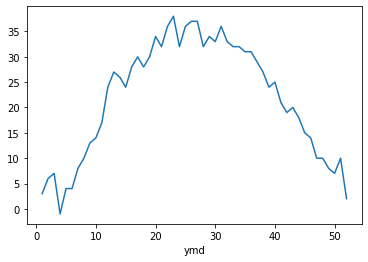

In [16]:
df.groupby(df.index.week)["bWendu"].max().plot()

#### 统计每个月的数据

In [17]:
df.groupby(df.index.month)["bWendu"].max()

ymd
1      7
2     12
3     27
4     30
5     35
6     38
7     37
8     36
9     31
10    25
11    18
12    10
Name: bWendu, dtype: int32

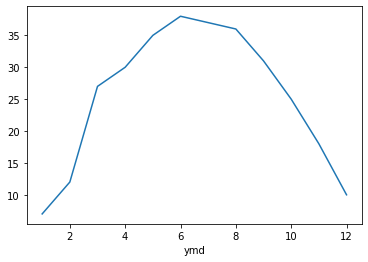

In [18]:
df.groupby(df.index.month)["bWendu"].max().plot()

#### 统计每个季度的数据

In [19]:
df.groupby(df.index.quarter)["bWendu"].max()

ymd
1    27
2    38
3    37
4    25
Name: bWendu, dtype: int32

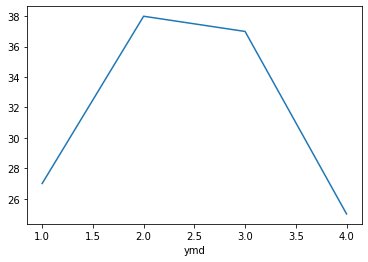

In [20]:
df.groupby(df.index.quarter)["bWendu"].max().plot()